In [7]:
import torch
torch.manual_seed(17)
import torch.nn as nn
import torch.nn.functional as F
import PIL.Image as Image
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms

In [8]:
class BlendNet(nn.Module):
  def __init__(self, alpha):
    super(BlendNet, self).__init__()
    self.alpha = nn.Parameter(alpha)
    #self.alpha = alpha
  

  def forward(self, bg_img, fg_img):

    rows,cols,channels = fg_img.shape

    # tensor = torch.tensor((), dtype=torch.uint8)
    # one = tensor.new_ones(fg_img.shape)
    # beta = one - self.alpha

    beta = 1.0 - self.alpha 

    bg_img[370:440,610:710] = torch.mul(fg_img[370:440,610:710], self.alpha) + torch.mul(bg_img[370:440,610:710], beta)

    tr = transforms.Lambda(lambda img: torch.from_numpy(np.array(img).astype(np.uint8)))
    bg_img[370:440,610:710] = tr(bg_img[370:440,610:710])


    return bg_img


In [9]:
# Load
path1 = '/content/drive/MyDrive/Detectron Blending Experiments/original.jpg'
path2 = '/content/drive/MyDrive/Detectron Blending Experiments/balloon2.jpg'
img_fg = Image.open(path2)
img_bg = Image.open(path1)

# Convert to tensor and change dtype
tr = transforms.Lambda(lambda img: torch.from_numpy(np.array(img).astype(np.uint8)))
img_fg = tr(img_fg)
img_bg = tr(img_bg)

print("fg shape",img_fg.shape)
print("bg shape",img_bg.shape)

alpha_tensor = torch.rand(size=(70,100,3))

my_nn = BlendNet(alpha=alpha_tensor)
result = my_nn(img_bg, img_fg)
print(result.shape)

fg shape torch.Size([683, 1024, 3])
bg shape torch.Size([683, 1024, 3])
torch.Size([683, 1024, 3])


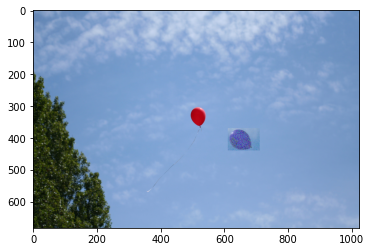

In [10]:
plt.imshow(result)